# *Content*

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [35]:
dataset = pd.read_csv('creditcard.csv')

In [36]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [37]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [39]:
dataset.shape

(284807, 31)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [41]:
dataset.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

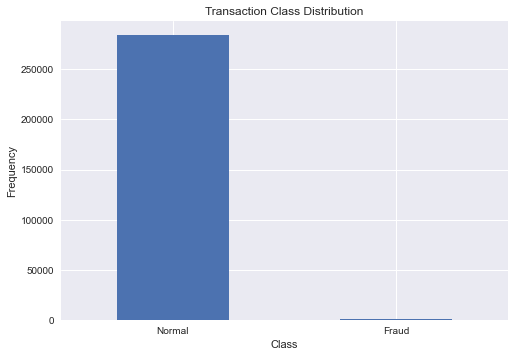

In [42]:
plt.style.use('seaborn')

count_classes = pd.value_counts(dataset['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), ["Normal", "Fraud"])

plt.xlabel("Class")

plt.ylabel("Frequency")

In [43]:
fraud_data = dataset[dataset['Class']==1]

normal_data = dataset[dataset['Class']==0]

In [44]:
print(fraud_data.shape,normal_data.shape)

(492, 31) (284315, 31)


In [45]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [46]:
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [47]:
#Calculating no. of frauds and non-frauds

fc = fraud_data.Amount.count()
nc = normal_data.Amount.count()
print(fc)
print(nc)

492
284315


In [48]:
#Calculating non-fraud percentage

per = ((nc*100)/(nc+fc))
print(per)

99.827251436938


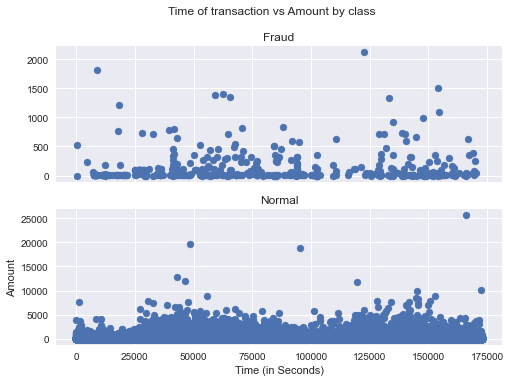

In [49]:
plt.style.use('seaborn')
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud_data.Time, fraud_data.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal_data.Time, normal_data.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

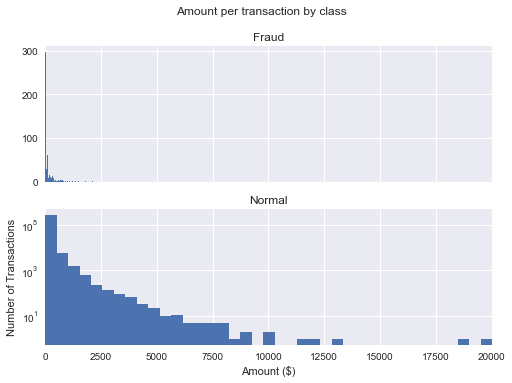

In [50]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud_data.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal_data.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

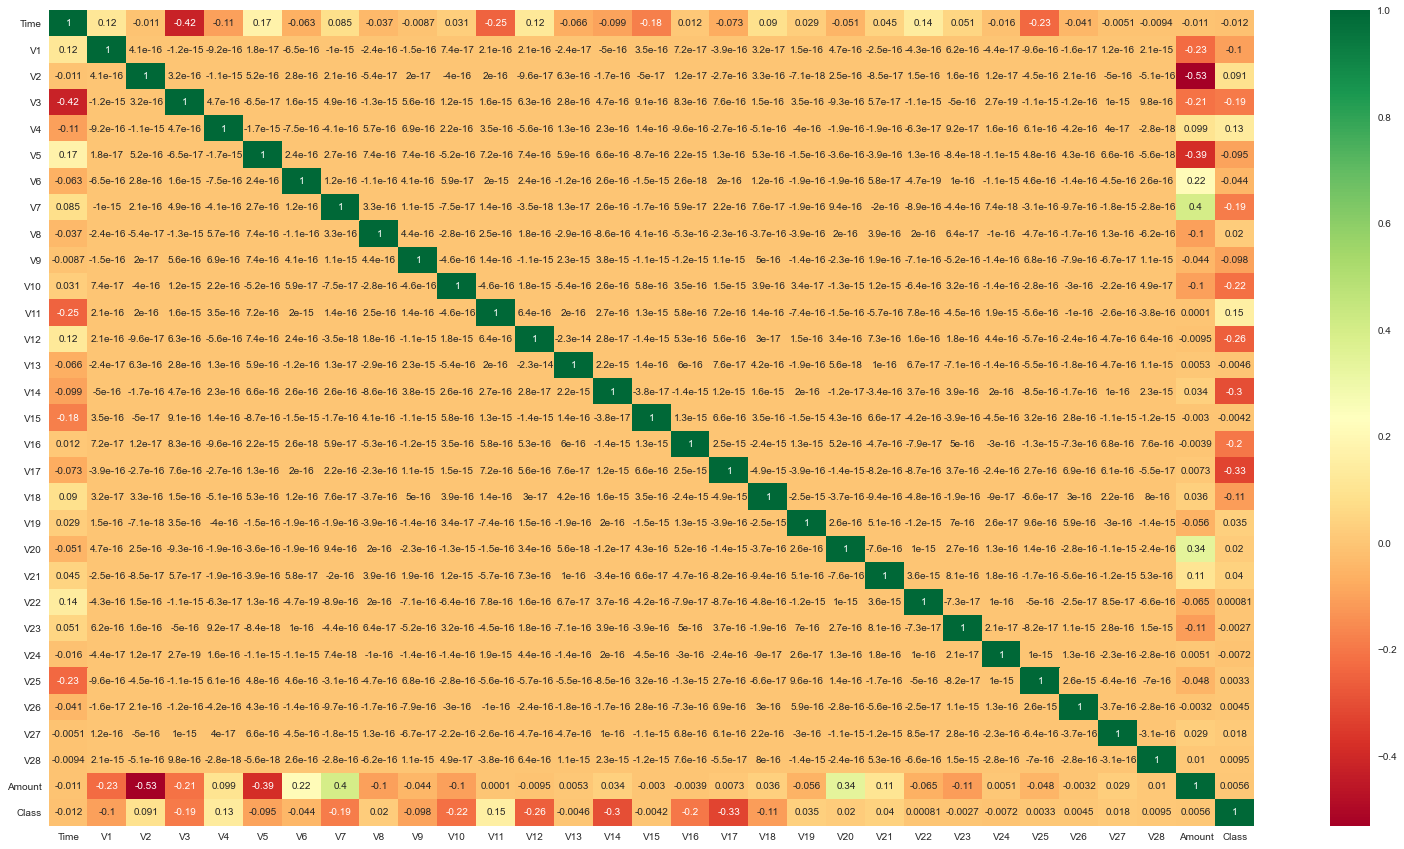

In [51]:
## Correlation
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(27,15))

#plot heat map
g=sb.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [52]:
dataC = dataset.copy()

In [53]:
sc = StandardScaler()

dataC[['Time', 'Amount']] = sc.fit_transform(dataC[['Time', 'Amount']])

In [54]:
dataC.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,2.913952e-17,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [55]:
frauds = dataC[dataC['Class']==1].copy()
non_frauds = dataC[dataC['Class']==0].copy()

In [56]:
x_train_fraud = frauds.sample(frac=0.8, random_state=27)
x_test_fraud = frauds.loc[~frauds.index.isin(x_train_fraud.index)]

x_train_non_fraud = non_frauds.sample(frac=0.8, random_state=27)
x_test_non_fraud = non_frauds.loc[~non_frauds.index.isin(x_train_non_fraud.index)]

In [57]:
print(f'Train \'fraud\' shape is: {x_train_fraud.shape}')
print(f'Test \'fraud\' shape is: {x_test_fraud.shape}')
print(f'Train \'non-fraud\' shape is: {x_train_non_fraud.shape}')
print(f'Test \'non-fraud\' shape is: {x_test_non_fraud.shape}')

Train 'fraud' shape is: (394, 31)
Test 'fraud' shape is: (98, 31)
Train 'non-fraud' shape is: (227452, 31)
Test 'non-fraud' shape is: (56863, 31)


In [58]:
train = pd.concat([x_train_non_fraud, x_train_fraud])
test = pd.concat([x_test_non_fraud, x_test_fraud])

In [59]:
# Shuffle dataframes in-place and reset the index
train = train.sample(frac=1, random_state=27).reset_index(drop=True)
test = test.sample(frac=1, random_state=27).reset_index(drop=True)

In [60]:
print(f'Original size is: {dataset.shape}')
print(f'Train size is: {train.shape} with perc = {train.shape[0]/dataset.shape[0]}')
print(f'Test size is: {test.shape} with perc = {test.shape[0]/dataset.shape[0]}')

Original size is: (284807, 31)
Train size is: (227846, 31) with perc = 0.8000014044598623
Test size is: (56961, 31) with perc = 0.1999985955401377


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support

In [62]:
def evaluate_model(labels, preds):
    accuracy = (preds == labels).sum() / preds.shape[0]
    print(f'Accuracy: {accuracy}')

    auc = roc_auc_score(labels, preds)
    print(f'AUC     : {auc}')

    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, preds, average = 'binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')

    confusion_matrix = pd.crosstab(index=labels, columns=np.round(preds), 
                                   rownames=['True'], colnames=['predictions']).astype(int)
    print(confusion_matrix)
    plt.figure(figsize = (5,5))
    sb.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix') 
    
    return {'Accuracy':accuracy, 'Auc':auc, 'Precicion':precision, 'Recall':recall, 'F1_Score':f1_score}

In [63]:
xtrain = train.drop(columns=['Class'], axis=1)
ytrain = train.Class

xtest = test.drop(columns=['Class'], axis=1)
ytest = test.Class

Accuracy: 0.9991046505503766
AUC     : 0.7907283958903013
Precision: 0.8507462686567164
Recall: 0.5816326530612245
F1_score: 0.6909090909090908
predictions      0   1
True                  
0            56853  10
1               41  57


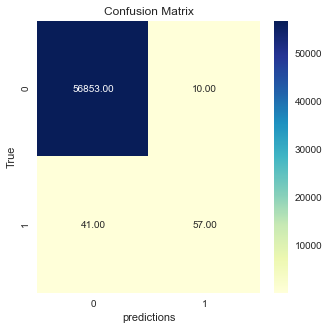

In [64]:
logReg_base = LogisticRegression()
logReg_base.fit(xtrain, ytrain)

predictions_base = logReg_base.predict(xtest)
result_base = evaluate_model(ytest, predictions_base)

Text(0.5, 1.0, 'Original Distribution of the dataset')

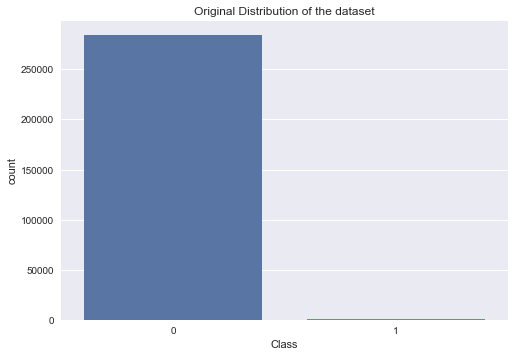

In [65]:
sb.countplot(x=dataset['Class'])
plt.title('Original Distribution of the dataset')

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print (confusion_matrix(ytest,predictions_base))
print (classification_report(ytest,predictions_base))

[[56853    10]
 [   41    57]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.58      0.69        98

    accuracy                           1.00     56961
   macro avg       0.93      0.79      0.85     56961
weighted avg       1.00      1.00      1.00     56961

